# NFL Fantasy Analysis

Here I'm going to try to anazlyse the stats that help the players on my fantasy roster, I may even train a model for them each (which may require a lot more historial data). Some requirements
1. I need to be able to quickly grab the players & defense on my roster as I will have to change players each week
2. The first analysis I need to do is on the stats that get me the most posts
  1. ie. QB throws to TD
  2. 1 is the only

## Questions
1. Dylan asserted that its better to pickup a QB later as the difference in points between a good and a bad qb isn't as great as the difference between a good RB/WR

## Plan

### Classes

#### Player

1. Data: 
  1. Name
  1. Position
  1. Team
  1. Pandas Dataframe - selecting the year and the player, it shoudl also reduce the dataset columns to just ones relevant to the player position.
    - add column with fantasy points per game
  1. Dictionary with metadata
1. Methods:
  1. Constructor - Accepts player and year and grabs data for the player and which year of data
    1. Initializes returning # columns and # entries
  1. Fantasy Analysis - A method that generates a set of graphs or summary graph suite that give a good indication of the player performance
  1. Other specific graphs

Grabbing multiple players?
  
#### Team


#### Roster

1. Data:
  1. Current Date
  2. line
  3. bench
1. 
  1. Add
  2. Delete player
  3. Send (to bench or to line)

# Log

- Oct 6: brought in all datasets and also created function that takes an off player played games ie. `off_stats` and calculates their fantasy points for that game using a fantasy fules dataset `fan_off_points`.

In [1]:
from operator import index
import pandas as pd
import numpy as np
import seaborn as sns

off_stats = pd.read_csv("nfl_pass_rush_receive_raw_data.csv")
kick_stats = pd.read_csv("nfl_kicking_raw_data.csv")
def_stats = pd.read_csv("nfl_dst_raw_data.csv")
nfl_teams = pd.read_csv("nfl_teams.csv")
fan_off_points = pd.read_csv("fan_off_points.csv", index_col= "stat_code")



(19973, 70)


Aaron Jones            4
Alvin Kamara           3
Mike Evans             3
Davante Adams          3
Stefon Diggs           2
Tyreek Hill            2
Derrick Henry          2
Travis Kelce           2
Tyler Lockett          2
Christian McCaffrey    2
Michael Thomas         1
D.K. Metcalf           1
Gabriel Davis          1
Ja'Marr Chase          1
Tee Higgins            1
Leonard Fournette      1
Austin Ekeler          1
Jonathan Taylor        1
James Conner           1
Lamar Jackson          1
Mark Andrews           1
Justin Herbert         1
Darren Waller          1
Keenan Allen           1
Dalvin Cook            1
Marvin Jones           1
Russell Wilson         1
Chase Claypool         1
George Kittle          1
Joe Mixon              1
Sammy Watkins          1
Chris Godwin           1
Raheem Mostert         1
Deshaun Watson         1
Saquon Barkley         1
Drew Brees             1
Will Fuller            1
Aaron Rodgers          1
Patrick Mahomes        1
Name: player, dtype: int6

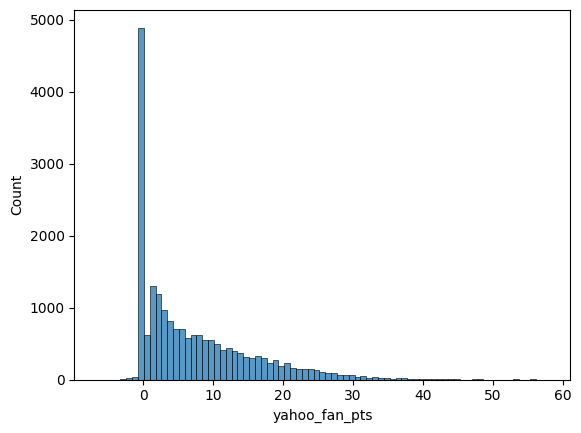

In [2]:
def add_fantasy_points_off(off_stats, fan_off_points):
    """in-place calculates a new column for input offensive data off_stats which has the total fantasy points earned based on the rules in the input dataset fan_off_points"""

    # take the fantasy offence points dataset and grab the stats which contribute fantasy points
    fan_off_stats_list = fan_off_points.index.values.tolist()

    #create a dataframe with games and their fantasy stats converted to points
    stat_points = pd.DataFrame()
    for stat in fan_off_stats_list:
        points = fan_off_points.loc[stat,:][1]
        stat_points[stat] = points*off_stats[stat]

    # total the points for each game
    temp_df = pd.DataFrame(np.zeros((len(off_stats), 1)))
    temp_df = stat_points.sum(axis = 1)
    temp_df.head()

    # create a new column for off_ stats which contains fantasy point totals for each game
    off_stats['yahoo_fan_pts'] = temp_df

add_fantasy_points_off(off_stats, fan_off_points)
print(off_stats.shape)

sns.histplot(data = off_stats, x = 'yahoo_fan_pts')
(off_stats.loc[off_stats['yahoo_fan_pts'] >40])['player'].value_counts()

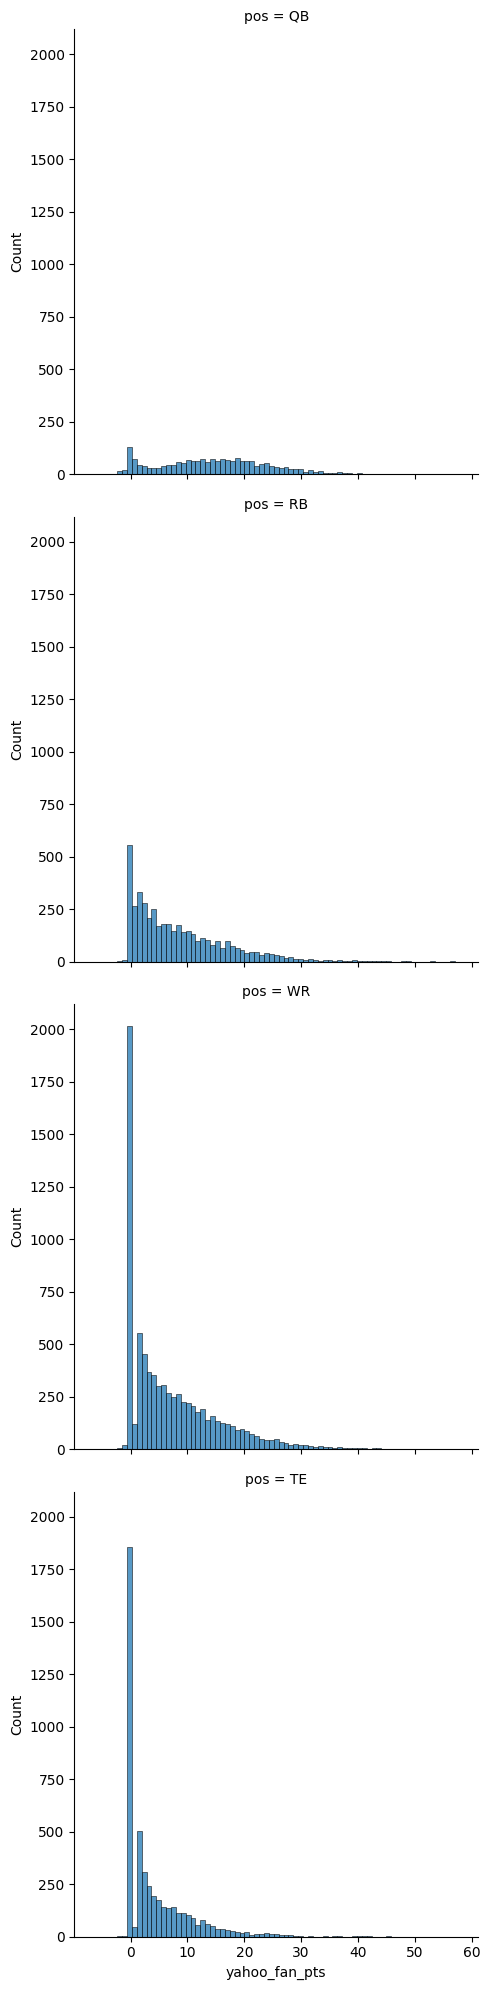

In [16]:
#historgram of QB fantasy points scored
#sns.histplot(data = off_stats[off_stats['pos'] == 'QB'], x = 'yahoo_fan_pts')
#sns.histplot(data = off_stats[off_stats['pos'] == 'WR'], x = 'yahoo_fan_pts')
#sns.histplot(data = off_stats[off_stats['pos'] == 'RB'], x = 'yahoo_fan_pts')
#sns.histplot(data = off_stats[off_stats['pos'] == 'TE'], x = 'yahoo_fan_pts')
sns.displot(data = off_stats[off_stats['pos'].isin(['QB', 'WR', 'RB', 'TE'])], x = 'yahoo_fan_pts', row = 'pos')

Wide Receivers
count    42.000000
mean     15.297619
std       7.171675
min       5.500000
25%       9.125000
50%      14.650000
75%      19.850000
max      30.600000
Name: yahoo_fan_pts, dtype: float64
count    47.000000
mean     13.674468
std       7.579190
min       0.000000
25%       7.900000
50%      13.100000
75%      18.100000
max      30.300000
Name: yahoo_fan_pts, dtype: float64
count    37.000000
mean      9.175676
std       9.691818
min       0.000000
25%       2.600000
50%       7.000000
75%      12.500000
max      52.100000
Name: yahoo_fan_pts, dtype: float64


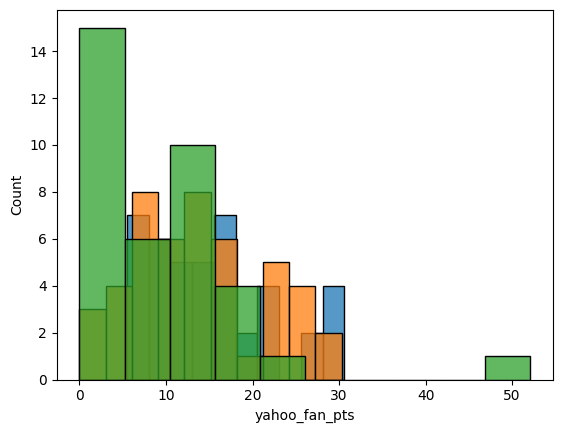

In [21]:
def describe(off_stats, player_name):
    player = off_stats[off_stats['player'] == player_name]
    print(player['yahoo_fan_pts'].describe())
    sns.histplot(data = player, x = 'yahoo_fan_pts', bins = 10)


# below I'm going to try grabbing the data for a player on my fantasy roster - Josh Allen
# After this I will send in a list - my list of fantasy players
fan_roster_dict ={"date": "2022-10-6", "line": ["Josh Allen", "Terry McLaurin","Robert Woods", "Joe Mixon", "Rashaad Penny", "Dalton Schultz", "Gabriel Davis"], "bench": [ "Donovan Peoples-Jones", "Keenan Allen", "Rex Burkhead", "Kenneth Gainwell", "Albert Okwuegbunam", "Matt Ryan"], "defense": "GNB"}
print("Wide Receivers")
describe(off_stats, "Robert Woods")
describe(off_stats, "Terry McLaurin")
describe(off_stats, "Gabriel Davis")

In [41]:
line_fan_summary = pd.DataFrame()
for player_name in fan_roster_dict['line']:
    next_player = (off_stats[off_stats['player'] == player_name])['yahoo_fan_pts'].describe()
    next_player = next_player.rename(player_name)
    if len(line_fan_summary) == 0:
        line_fan_summary= next_player
    else:
        line_fan_summary = pd.concat([line_fan_summary, next_player], axis = 1) 

print("Line Fantasy Point Summary Statistics")
line_fan_summary

Line Fantasy Point Summary Statistics


,Josh Allen,Terry McLaurin,Robert Woods,Joe Mixon,Rashaad Penny,Dalton Schultz,Gabriel Davis
count,55.000000,47.000000,42.000000,42.000000,23.000000,50.000000,37.000000
mean,22.938545,13.674468,15.297619,16.143810,8.713043,7.456000,9.175676
std,8.811003,7.579190,7.171675,8.806418,10.620876,7.322405,9.691818
min,0.200000,0.000000,5.500000,3.700000,-1.800000,0.000000,0.000000
25%,16.520000,7.900000,9.125000,9.325000,0.900000,0.000000,2.600000
50%,20.940000,13.100000,14.650000,14.700000,2.600000,6.900000,7.000000
75%,29.780000,18.100000,19.850000,21.525000,16.200000,12.225000,12.500000
max,38.920000,30.300000,30.600000,42.100000,32.500000,26.000000,52.100000


Running Backs
count    42.000000
mean     16.143810
std       8.806418
min       3.700000
25%       9.325000
50%      14.700000
75%      21.525000
max      42.100000
Name: yahoo_fan_pts, dtype: float64
count    23.000000
mean      8.713043
std      10.620876
min      -1.800000
25%       0.900000
50%       2.600000
75%      16.200000
max      32.500000
Name: yahoo_fan_pts, dtype: float64


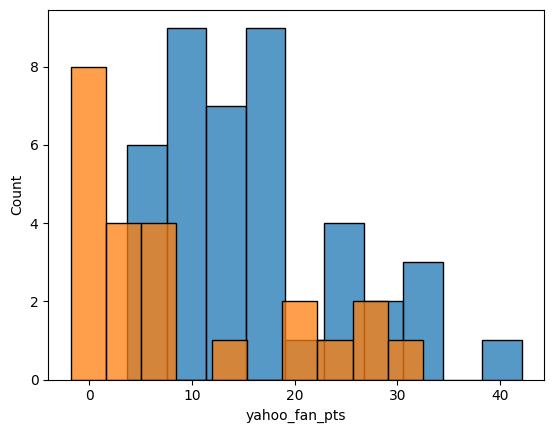

In [22]:
print("Running Backs")
describe(off_stats, "Joe Mixon")
describe(off_stats, "Rashaad Penny")

In [7]:
print(player.info())
print(len(player))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 217 to 19862
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_id                       55 non-null     object 
 1   player_id                     55 non-null     object 
 2   pos                           55 non-null     object 
 3   player                        55 non-null     object 
 4   team                          55 non-null     object 
 5   pass_cmp                      55 non-null     int64  
 6   pass_att                      55 non-null     int64  
 7   pass_yds                      55 non-null     int64  
 8   pass_td                       55 non-null     int64  
 9   pass_int                      55 non-null     int64  
 10  pass_sacked                   55 non-null     int64  
 11  pass_sacked_yds               55 non-null     int64  
 12  pass_long                     55 non-null     int64  
 13  pa

In [8]:
player['team'].value_counts()

BUF    55
Name: team, dtype: int64

In [13]:
defense = def_stats[def_stats['team'] == "GNB"]
len(defense)



54

In [ ]:
def_stats[]